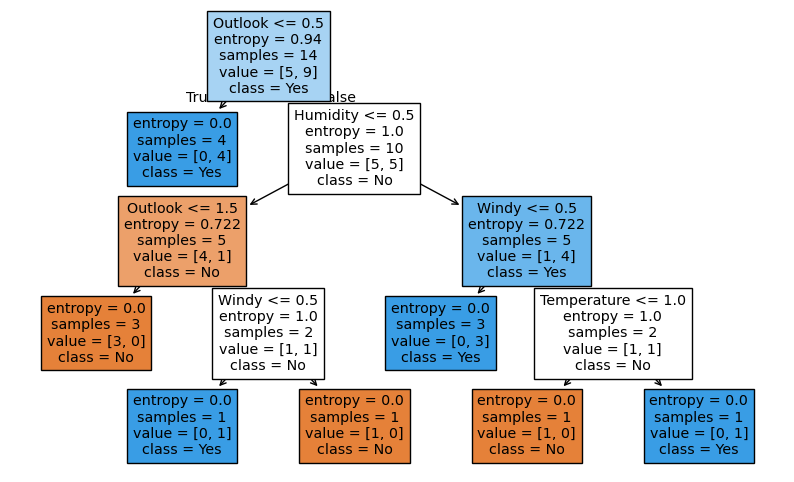

Play Golf Prediction: Yes


In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
 

# Define the dataset
data = {
    "Outlook": ["Rainy", "Rainy", "Overcast", "Sunny", "Sunny", "Sunny", "Overcast", "Rainy", "Rainy", "Sunny", "Rainy", "Overcast", "Overcast", "Sunny"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Windy": ["False", "True", "False", "False", "False", "True", "True", "False", "False", "False", "True", "True", "False", "True"],
    "PlayGolf": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
}
 

# Convert to DataFrame
df = pd.DataFrame(data)
 

# Convert categorical values to numeric
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])
 

# Define Features and Target Variable
X = df.drop(columns=["PlayGolf"])
y = df["PlayGolf"]
 

# Train Decision Tree
clf = DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(X, y)
 

# Visualize the Tree
plt.figure(figsize=(10, 6))
tree.plot_tree(clf, feature_names=["Outlook", "Temperature", "Humidity", "Windy"], class_names=["No", "Yes"], filled=True)
plt.show()
 

# Test the model with new data
test_data = pd.DataFrame({
    "Outlook": ["Sunny"],
    "Temperature": ["Cool"],
    "Humidity": ["High"],
    "Windy": ["True"]
})
 

# Convert test data to numerical values
for col in test_data.columns:
    test_data[col] = le.fit_transform(test_data[col])
 

# Predict
prediction = clf.predict(test_data)
print("Play Golf Prediction:", "Yes" if prediction[0] == 1 else "No")